In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df=pd.read_csv("stock_prices.csv")
df.shape

(1762, 7)

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,04-01-2010,NFLX,55.519999,53.479999,52.960001,55.730000,17239600
1,05-01-2010,NFLX,53.570001,51.510001,50.810001,53.599998,23753100
2,06-01-2010,NFLX,51.530001,53.319999,50.380002,53.710001,23290400
3,07-01-2010,NFLX,54.120000,52.400001,52.240001,54.300001,9955400
4,08-01-2010,NFLX,52.490000,53.300002,52.260001,54.199999,8180900


In [5]:
#Get the number of trading days 
df.shape

(1762, 7)

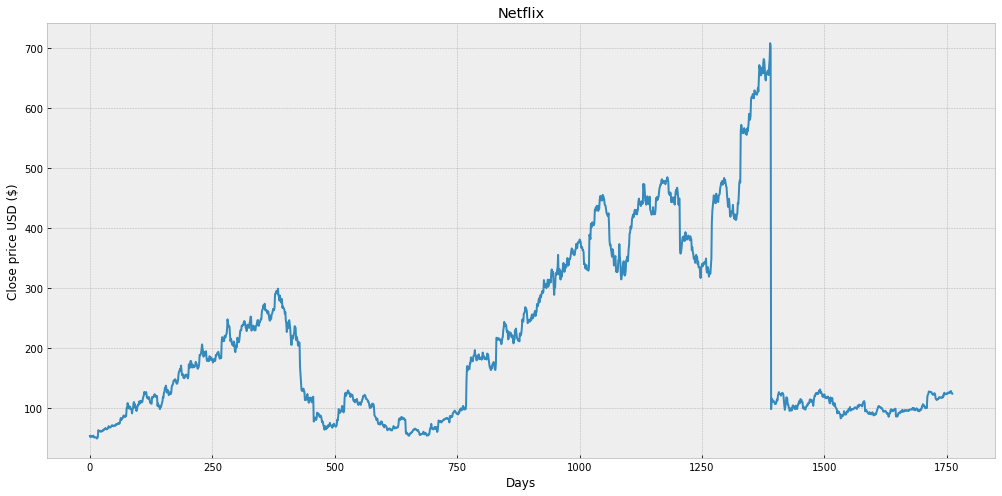

In [7]:
#Visualize the close price data
plt.figure(figsize=(17,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['close'])
plt.show()

In [82]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['close']].shift(-future_days)
df.head(50)

<ipython-input-82-cfd8f099d1a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['close']].shift(-future_days)


,date,symbol,open,close,low,high,volume,Prediction
0,04-01-2010,NFLX,55.519999,53.479999,52.960001,55.730000,17239600,62.130000
1,05-01-2010,NFLX,53.570001,51.510001,50.810001,53.599998,23753100,61.489999
2,06-01-2010,NFLX,51.530001,53.319999,50.380002,53.710001,23290400,63.360002
3,07-01-2010,NFLX,54.120000,52.400001,52.240001,54.300001,9955400,63.179997
4,08-01-2010,NFLX,52.490000,53.300002,52.260001,54.199999,8180900,64.860003
5,11-01-2010,NFLX,53.619999,53.230000,52.700001,53.929999,6783700,64.510001
6,12-01-2010,NFLX,52.700001,52.370000,52.159999,53.080000,6330100,66.099998
7,13-01-2010,NFLX,53.290001,53.960000,52.909999,54.280001,14422100,66.649997
8,14-01-2010,NFLX,52.630000,50.989999,50.890000,53.029999,17685500,65.269999
9,15-01-2010,NFLX,50.719999,50.950001,50.630001,51.849998,13031200,64.349998


In [ ]:
df = df.iloc[:-future_days,]
df.tail()

In [27]:
#Create the feature data set (X) and convert it into numpy array and remove the last 'x' rows/days
#X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X = np.array(df.loc[:,['open','close','low','high','volume']])
print(X)

[[5.55199990e+01 5.34799990e+01 5.29600010e+01 5.57300000e+01
  1.72396000e+07]
 [5.35700010e+01 5.15100010e+01 5.08100010e+01 5.35999980e+01
  2.37531000e+07]
 [5.15300010e+01 5.33199990e+01 5.03800020e+01 5.37100010e+01
  2.32904000e+07]
 ...
 [1.16199997e+02 1.17959999e+02 1.16190002e+02 1.18720001e+02
  7.06450000e+06]
 [1.18320000e+02 1.18040001e+02 1.16980003e+02 1.19459999e+02
  7.00720000e+06]
 [1.17760002e+02 1.17690002e+02 1.17309998e+02 1.18889999e+02
  4.52130000e+06]]


In [28]:
#Create the target data set (y)and convert it to a numpy array and get all of the target values except the last 'x' rows
y = np.array(df['Prediction'])
print(y)

[ 62.13      61.489999  63.360002 ... 125.889999 125.330002 123.800003]


In [74]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)

In [75]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
#Create the models
#Create the Decision tree regressor model
tree =  DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)
#Create the Support vector regression model
svr = SVR().fit(x_train, y_train)

In [77]:
#Show the model tree prediction
tree_prediction = tree.predict(x_test)
#print(tree_prediction)

#Show the model linear regression prediction
lr_prediction = lr.predict(x_test)
#print(lr_prediction)

#Show the support vector regression
svr_prediction = svr.predict(x_test)
#print(svr_prediction)

In [78]:
#To get the accuracy of the prediction models

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [79]:
r2_score(y_test, svr_prediction)

0.7336714120135592

In [80]:
r2_score(y_test, lr_prediction)

0.7720582465358895

In [81]:
r2_score(y_test, tree_prediction )

0.8975401311713739